In [13]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%autoreload 2

In [15]:
import sys
import os
from pathlib import Path

In [16]:
BASE_PATH = Path(os.path.abspath('')).parent.parent.parent
sys.path.append(str(BASE_PATH))

In [17]:
from bandits import *
from bandits.reward_functions import *
from replay_engines.backtester import run_backtest
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import datetime

import matplotlib.pyplot as plt
import scienceplots

%matplotlib inline

# plt.style.use(['science','ieee'])
# plt.style.use(['science','nature'])

In [26]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table = pd.read_html(url)
sp500_table = table[0]
tickers = sp500_table['Symbol'].tolist()
len(tickers)

503

In [27]:
import datetime
import yfinance as yf
import re
import pandas as pd
import numpy as np

yf_obj = yf.Tickers(re.sub(r"'|,|\[|\]", "", str(tickers)))
today = datetime.date.today()

df_portfolio = pd.DataFrame()
for ticker in yf_obj.tickers.keys():
    if ticker not in df_portfolio.columns:
        print(ticker)
        df_ticker = yf_obj.tickers[ticker].history(start="2018-01-01", end=today)
        df_ticker["ticker"] = ticker
        df_ticker["return"] = np.log(df_ticker["Close"] / df_ticker["Close"].shift(1))
        df_ticker["return"] = df_ticker["return"].fillna(0)
        df_ticker = df_ticker.reset_index()
        df_ticker = df_ticker[["Date", "ticker", "return"]]
#         df_ticker = df_ticker[["Datetime", "ticker", "return"]]
        df_portfolio = pd.concat([df_portfolio, df_ticker])
df_portfolio = df_portfolio.pivot_table(values="return", index="Date", columns="ticker")
# df_portfolio = df_portfolio.pivot_table(values="return", index="Datetime", columns="ticker")
df_portfolio.to_csv('sp_portfolio_2025_01_12.csv')

MMM
AOS
ABT
ABBV
ACN
ADBE
AMD
AES
AFL
A
APD
ABNB
AKAM
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AEP
AXP
AIG
AMT
AWK
AMP
AME
AMGN
APH
ADI
ANSS
AON
APA
APO
AAPL
AMAT
APTV
ACGL
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
AXON
BKR
BALL
BAC
BAX
BDX
BRK.B


$BRK.B: possibly delisted; no timezone found
/var/folders/pr/c2dbtqtn2td9ylt9lvrqnrxc0000gn/T/ipykernel_24608/2072971163.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_portfolio = pd.concat([df_portfolio, df_ticker])


BBY
TECH
BIIB
BLK
BX
BK
BA
BKNG
BWA
BSX
BMY
AVGO
BR
BRO
BF.B


$BF.B: possibly delisted; no price data found  (1d 2018-01-01 -> 2025-01-12)
/var/folders/pr/c2dbtqtn2td9ylt9lvrqnrxc0000gn/T/ipykernel_24608/2072971163.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_portfolio = pd.concat([df_portfolio, df_ticker])


BLDR
BG
BXP
CHRW
CDNS
CZR
CPT
CPB
COF
CAH
KMX
CCL
CARR
CAT
CBOE
CBRE
CDW
CE
COR
CNC
CNP
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CAG
COP
ED
STZ
CEG
COO
CPRT
GLW
CPAY
CTVA
CSGP
COST
CTRA
CRWD
CCI
CSX
CMI
CVS
DHR
DRI
DVA
DAY
DECK
DE
DELL
DAL
DVN
DXCM
FANG
DLR
DFS
DG
DLTR
D
DPZ
DOV
DOW
DHI
DTE
DUK
DD
EMN
ETN
EBAY
ECL
EIX
EW
EA
ELV
EMR
ENPH
ETR
EOG
EPAM
EQT
EFX
EQIX
EQR
ERIE
ESS
EL
EG
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FICO
FAST
FRT
FDX
FIS
FITB
FSLR
FE
FI
FMC
F
FTNT
FTV
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GEHC
GEV
GEN
GNRC
GD
GIS
GM
GPC
GILD
GPN
GL
GDDY
GS
HAL
HIG
HAS
HCA
DOC
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HUBB
HUM
HBAN
HII
IBM
IEX
IDXX
ITW
INCY
IR
PODD
INTC
ICE
IFF
IP
IPG
INTU
ISRG
IVZ
INVH
IQV
IRM
JBHT
JBL
JKHY
J
JNJ
JCI
JPM
JNPR
K
KVUE
KDP
KEY
KEYS
KMB
KIM
KMI
KKR
KLAC
KHC
KR
LHX
LH
LRCX
LW
LVS
LDOS
LEN
LII
LLY
LIN
LYV
LKQ
LMT
L
LOW
LULU
LYB
MTB
MPC
MKTX
MAR
MMC
MLM
MAS
MA
MTCH
MKC
MCD
MCK
MDT
MRK
META
MET
MTD
MGM
MCHP
MU
MSFT
M

In [34]:
portfolio = df_portfolio.copy()

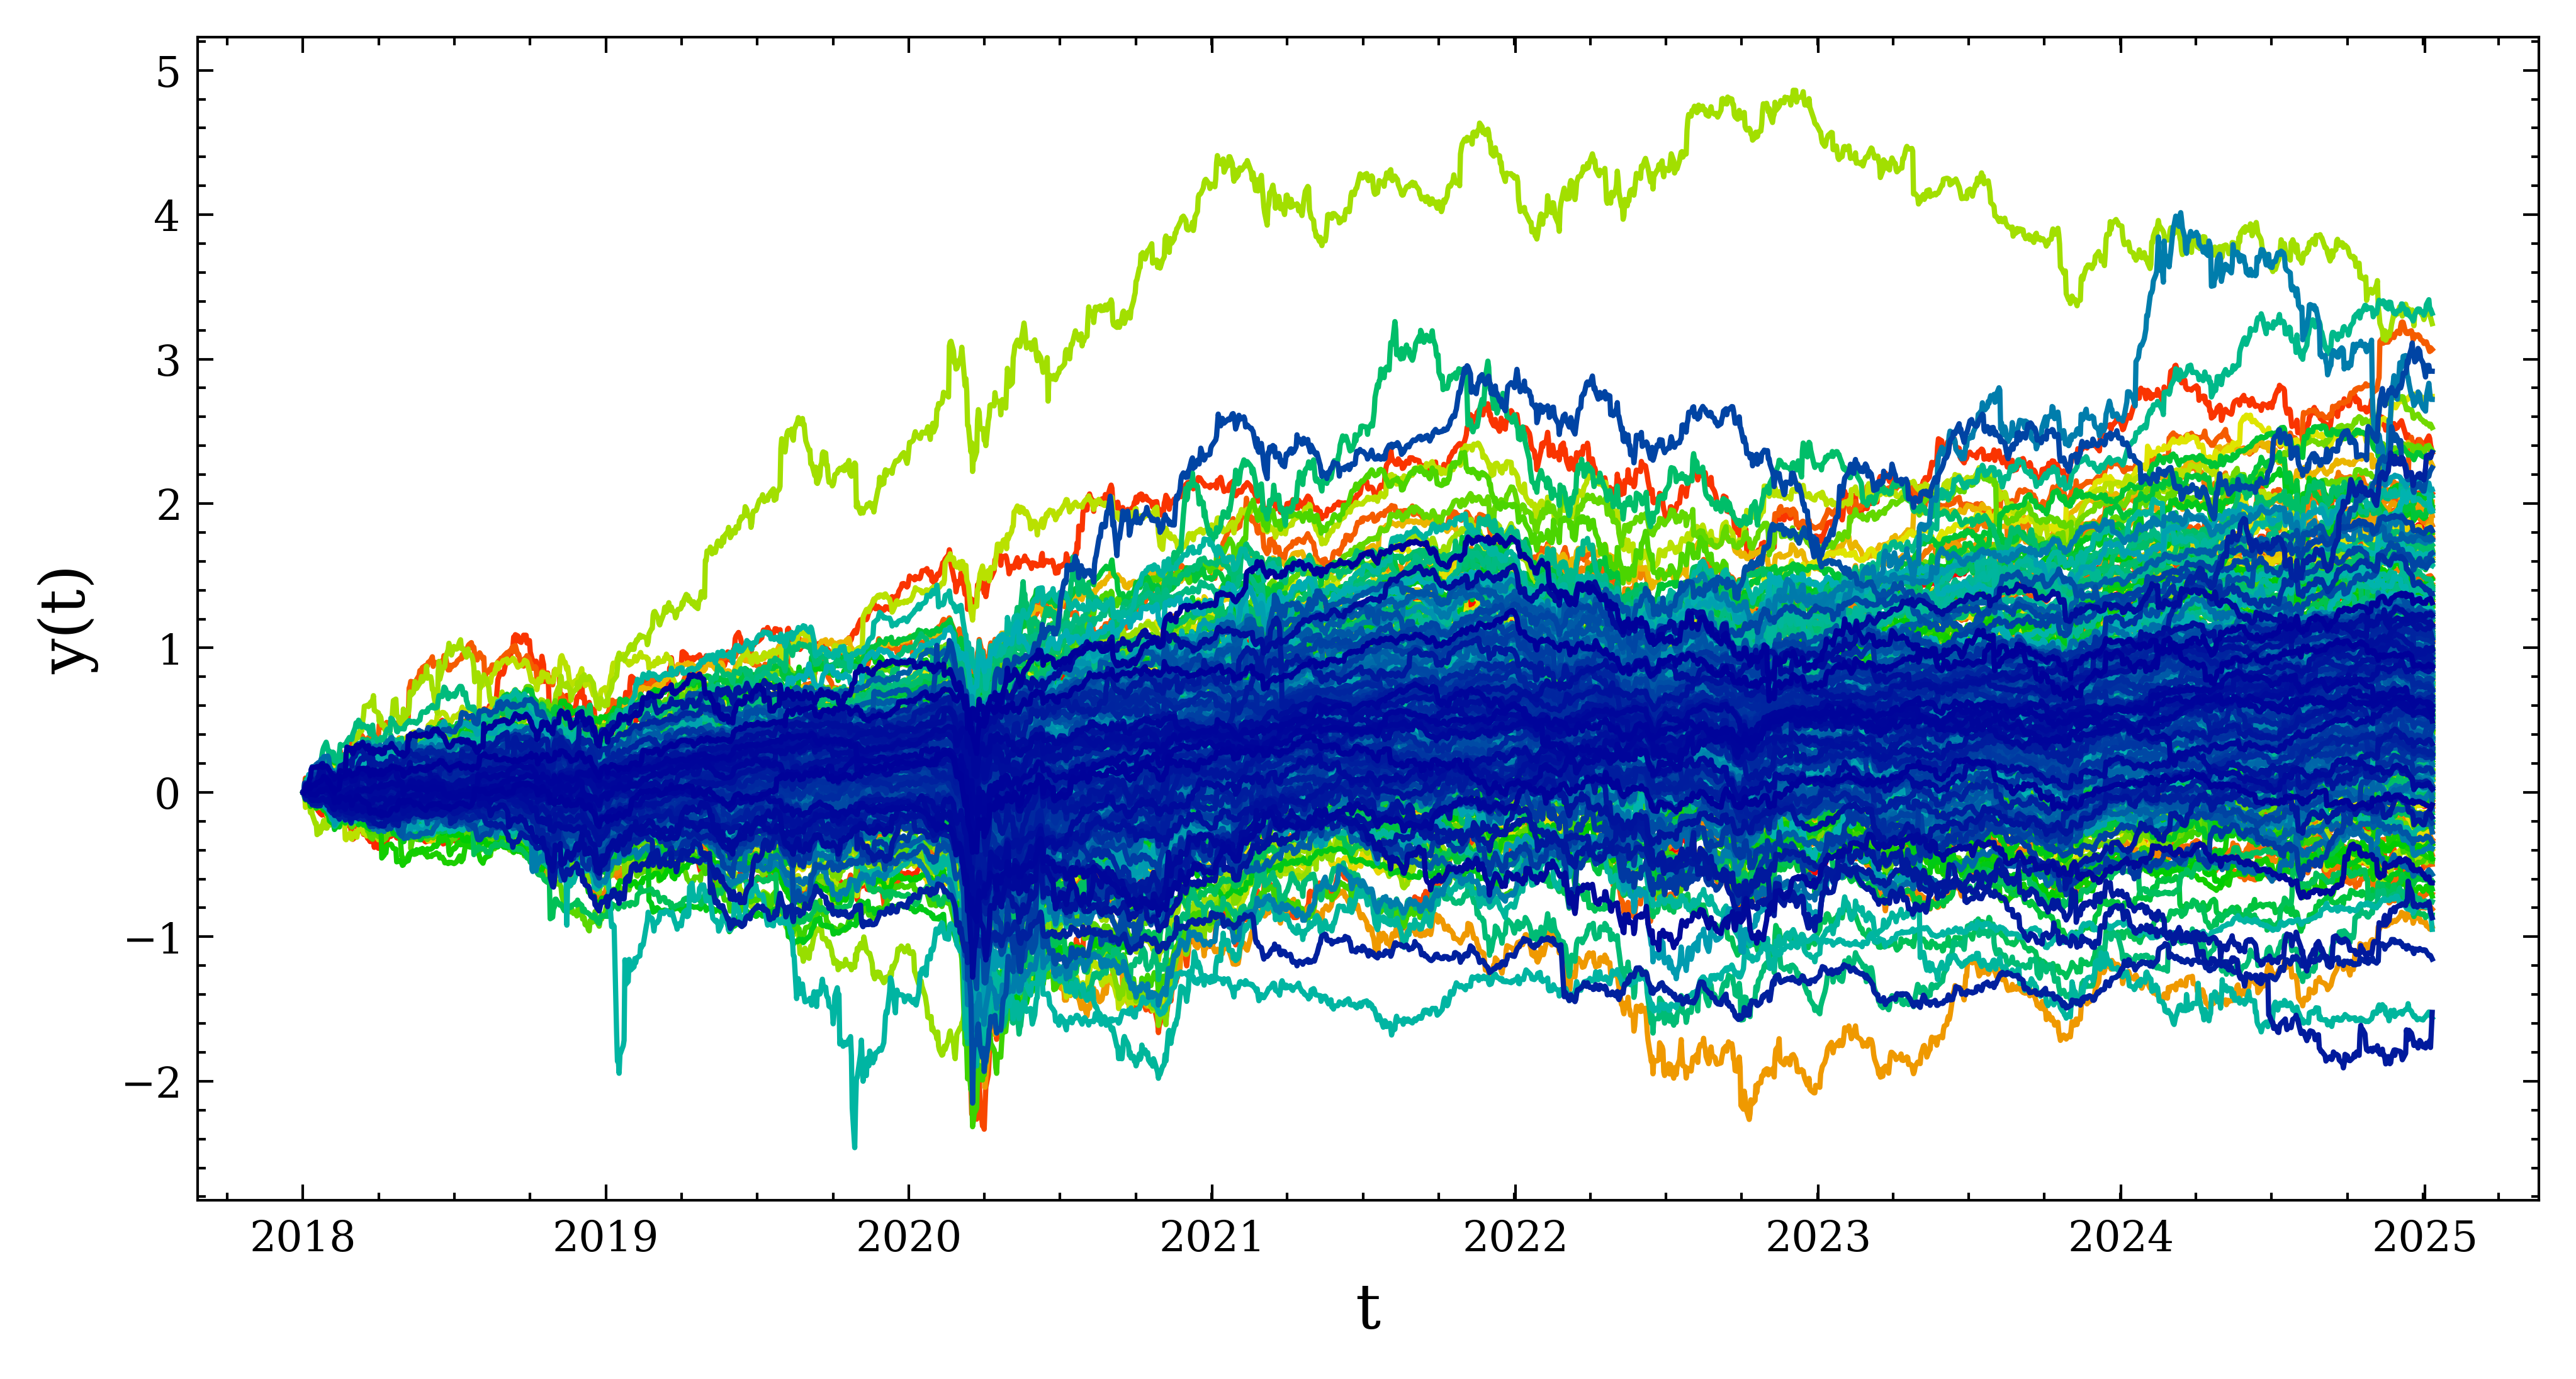

In [35]:
from colour import Color

blue = Color("red", luminance=0.5)
colors = list(blue.range_to(Color("blue", luminance=0.3), len(portfolio.columns)))

with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(8, 4))
    i = 0
    for col in portfolio.columns:
        plt.plot(portfolio[col].cumsum(), color=colors[i].rgb, linestyle="-")
        i += 1
#     plt.legend(portfolio.columns, fontsize=4)
    plt.xlabel('t', fontsize=12)
    plt.ylabel('y(t)', fontsize=12)
#     plt.savefig('figures/problem_3_sp_market_single_stock/classes.jpg', dpi=600)

## 1- Investigating the Rewards and Regrets

In [36]:
n_sim = 30
shift = 0
polices = {
    "ADTS (min)": {
        "policy_name": "AdaptiveDiscountedThompsonSampling",
        "args": {"n_arms": portfolio.shape[1], "gamma": 0.99, "f": "min", "w": 30},
        "agents": [],
    },
    "F-DSW TS (min)": {
        "policy_name": "CavenaghiFDSWTS",
        "args": {"n_arms": portfolio.shape[1], "gamma": 0.99, "f": "min", "n": 30},
        "agents": [],
    },
    # "ADTS (max)": {
    #     "policy_name": "AdaptiveDiscountedThompsonSampling",
    #     "args": {"n_arms": portfolio.shape[1], "gamma": 0.99, "f": "max", "w": 30},
    #     "agents": [],
    # },
    # "F-DSW TS (max)": {
    #     "policy_name": "CavenaghiFDSWTS",
    #     "args": {"n_arms": portfolio.shape[1], "gamma": 0.99, "f": "max", "n": 30},
    #     "agents": [],
    # },
    # "ADTS (mean)": {
    #     "policy_name": "AdaptiveDiscountedThompsonSampling",
    #     "args": {"n_arms": portfolio.shape[1], "gamma": 0.99, "f": "mean", "w": 30},
    #     "agents": [],
    # },
    # "F-DSW TS (mean)": {
    #     "policy_name": "CavenaghiFDSWTS",
    #     "args": {"n_arms": portfolio.shape[1], "gamma": 0.99, "f": "mean", "n": 30},
    #     "agents": [],
    # },
    # "D TS": {
    #     "policy_name": "BetaDiscountedThompsonSampling",
    #     "args": {"n_arms": portfolio.shape[1], "gamma": 0.99},
    #     "agents": [],
    # },
    # "Classical TS": {
    #     "policy_name": "ThompsonSampling",
    #     "args": {"n_arms": portfolio.shape[1]},
    #     "agents": [],
    # },
    # "D UCB": {
    #     "policy_name": "DiscountedUCB1",
    #     "args": {"n_arms": portfolio.shape[1], "gamma": 0.1},
    #     "agents": [],
    # },
    # "SW UCB": {
    #     "policy_name": "SlidingWindowUCB1",
    #     "args": {"n_arms": portfolio.shape[1], "w": 50},
    #     "agents": [],
    # },
    # "UCB1": {
    #     "policy_name": "UCB1",
    #     "args": {"n_arms": portfolio.shape[1]},
    #     "agents": [],
    # },
    # "$\epsilon$-Greedy": {
    #     "policy_name": "EpsilonGreedy",
    #     "args": {"n_arms": portfolio.shape[1], "epsilon": 0.02},
    #     "agents": [],
    # },
}
seeds = list(range(n_sim))
for policy_name, args in polices.items():
    rewards_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    regret_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    accuracy_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    chosen_arms_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    for i in tqdm(range(n_sim)):
        kwargs = args["args"].copy()
        kwargs["seed"] = seeds[i]
        rewards, policy = run_backtest(
            policy_name=args["policy_name"],
            policy_args=kwargs,
            portfolio=portfolio,
            arm=WindowedMeanReturnArm(window=100)
        )
        rewards_mxt[:, i] = np.array(rewards)
        regret_mxt[:, i] = np.array(policy.regret)
        accuracy_mxt[:, i] = np.array(policy.accuracy)
        polices[policy_name]["agents"].append(policy)
    polices[policy_name]["rewards_mxt"] = rewards_mxt
    polices[policy_name]["regret_mxt"] = regret_mxt
    polices[policy_name]["accuracy_mxt"] = accuracy_mxt
    polices[policy_name]["std_reward"] = np.std(rewards_mxt, axis=1)
    polices[policy_name]["mean_reward"] = np.mean(rewards_mxt, axis=1)
    polices[policy_name]["std_regret"] = np.std(regret_mxt, axis=1)
    polices[policy_name]["mean_regret"] = np.mean(regret_mxt, axis=1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [45:49<00:00, 91.65s/it]


In [37]:
accuracy_dict = {
    "policy": [],
    "mean accuracy": [],
    "std. accuracy": [],
}
for policy, output in polices.items():
    accuracy = output["accuracy_mxt"].sum(axis=0) / len(portfolio)
    accuracy_dict["policy"].append(policy)
    accuracy_dict["mean accuracy"].append(accuracy.mean())
    accuracy_dict["std. accuracy"].append(accuracy.std())
pd.DataFrame(accuracy_dict).sort_values("mean accuracy", ascending=False)

,policy,mean accuracy,std. accuracy
0,ADTS (min),0.002075,0.003631
1,F-DSW TS (min),0.001509,0.000572


In [ ]:
# summed_regrets = polices["TS"]["regret_mxt"].sum(axis=0)
# idx_min = np.where(summed_regrets == summed_regrets.min())[0]
# idx_max = np.where(summed_regrets == summed_regrets.max())[0]
# min_regret_env = polices["TS"]["regret_mxt"][:, idx_min]
# max_regret_env = polices["TS"]["regret_mxt"][:, idx_max]

# plt.plot(np.cumsum(polices["TS"]["mean_regret"]))
# plt.plot(np.cumsum(min_regret_env))
# plt.plot(np.cumsum(max_regret_env))

In [38]:
from colour import Color

blue = Color("blue", luminance=0.3)
colors = list(blue.range_to(Color("orange"), len(polices)))

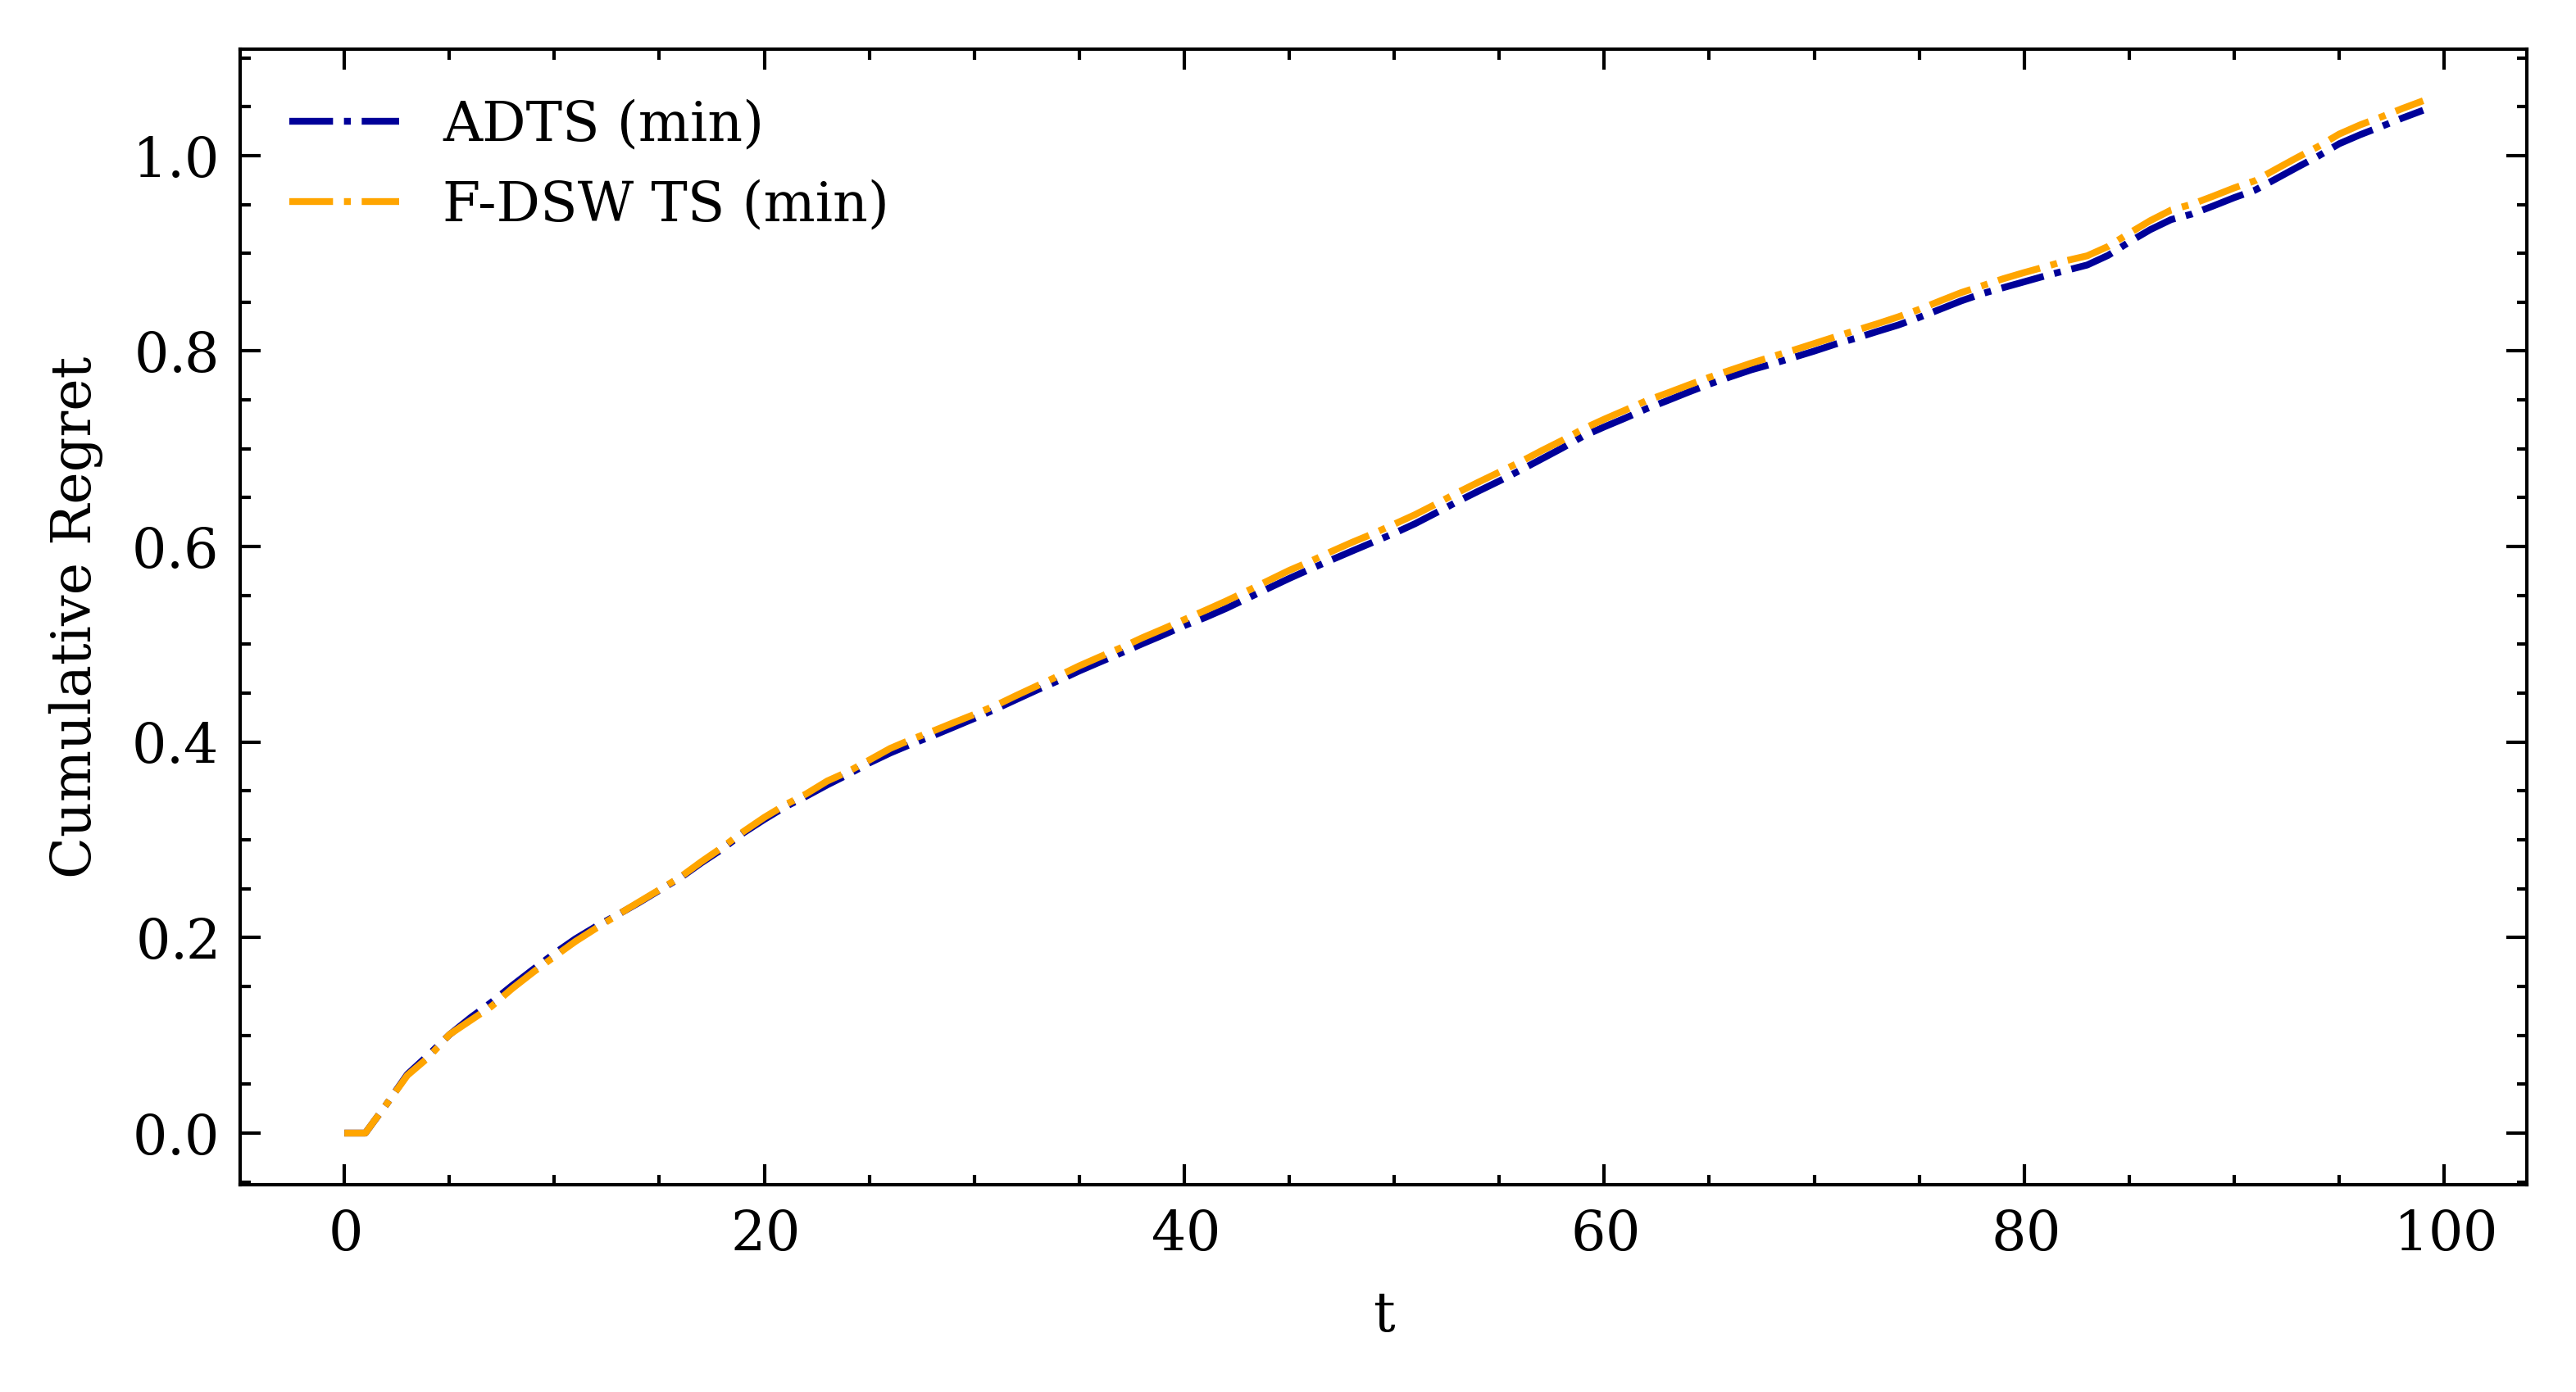

In [39]:
with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(6, 3))
    i = 0
    for policy, output in polices.items():
        plt.plot(np.cumsum(output["mean_regret"]), color=colors[i].rgb, linestyle="-.")
#         upper = np.cumsum(output["mean_regret"] + output["std_regret"])
#         lower = np.cumsum(output["mean_regret"] - output["std_regret"])
#         plt.fill_between(list(range(len(output["mean_regret"]))), upper, lower, color=colors[i].rgb, alpha=0.15)
        i += 1
    plt.legend([p for p in polices.keys()])
    plt.xlabel('t')
    plt.ylabel('Cumulative Regret')
    # plt.savefig('figures/problem_3_sp_market_single_stock/cumulative_regrets.jpg', dpi=400)

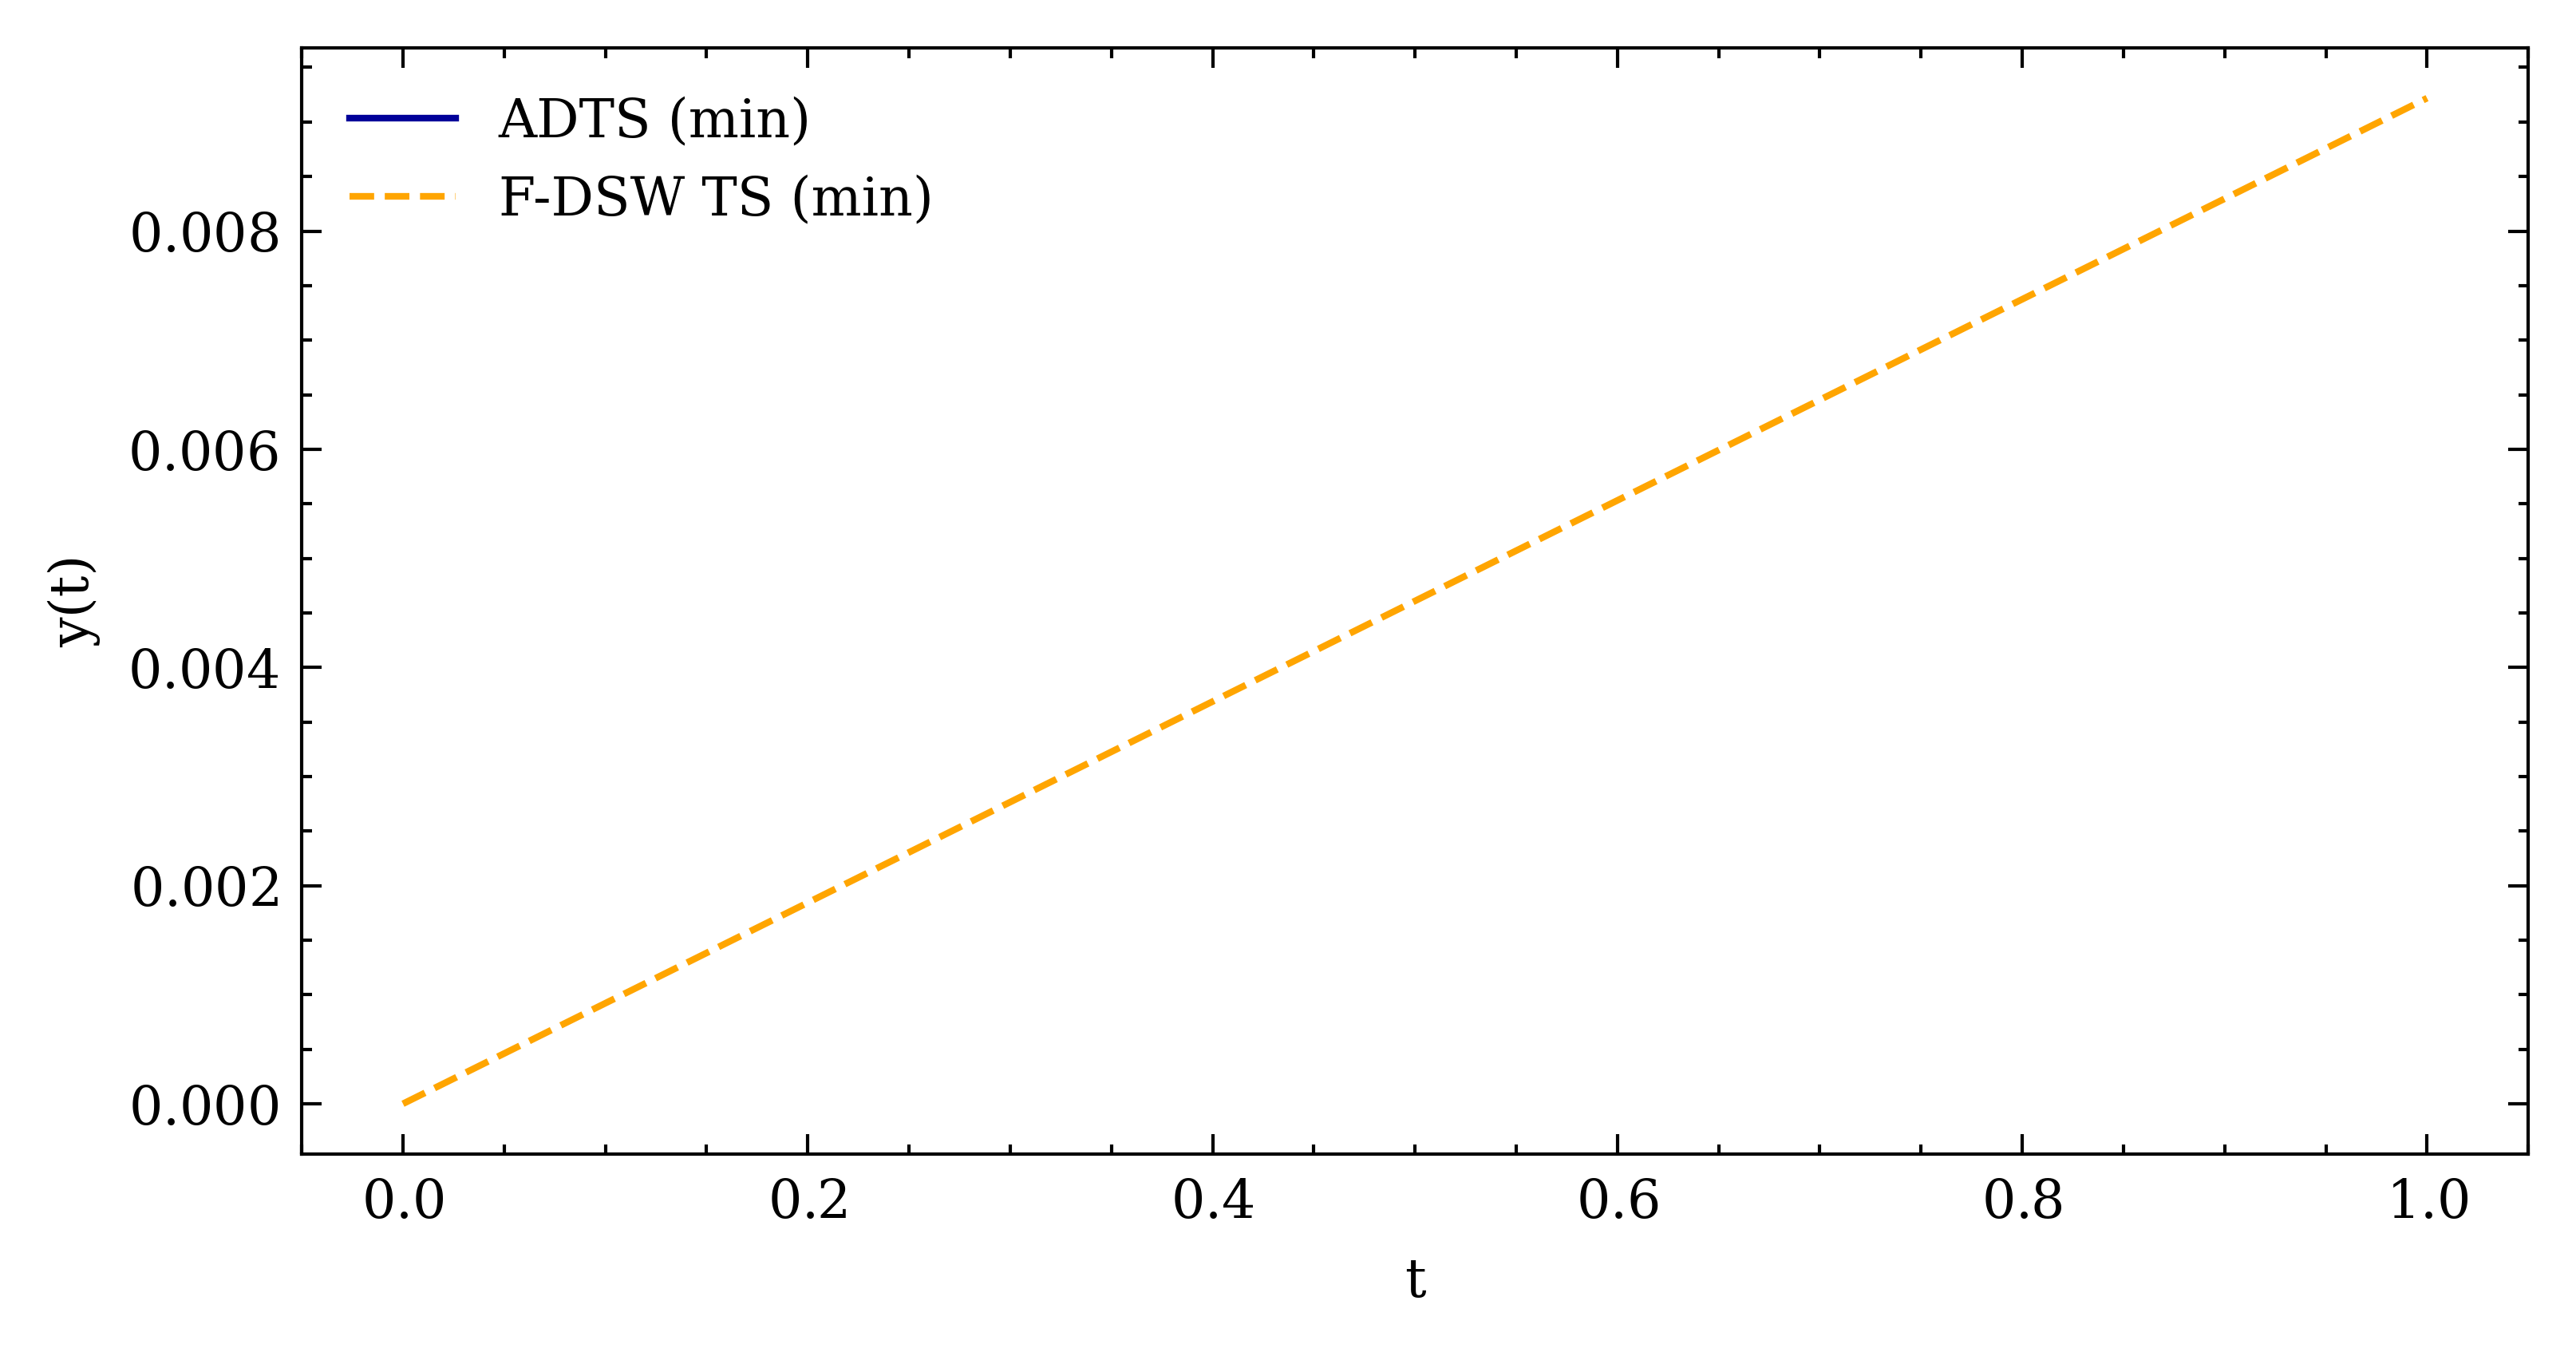

In [45]:
with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(6, 3))
    # oracle = portfolio.max(axis=1)
#     plt.plot(oracle, linewidth=3)
    legend = []
    i = 0
    for policy, output in polices.items():
        plt.plot(np.cumsum(output["mean_reward"]), color=colors[i].rgb)
        legend.append(policy)
        i+=1
    # for col in portfolio.columns:
    #     plt.plot(portfolio[col], "-k", alpha=0.15)
    
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend(legend)
    # plt.savefig('figures/problem_3_sp_market_single_stock/rewards_versus_oracle.jpg', dpi=400)

In [ ]:
with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(6, 3))
    oracle = portfolio.max(axis=1)
#     plt.plot(np.cumsum(oracle), linewidth=2)
#     legend = ["Oracle"]
    legend=[]
    i = 0
    for policy, output in polices.items():
        plt.plot(np.cumsum(output["mean_reward"]), color=colors[i].rgb)#, linestyle="-.")
        legend.append(policy)
        i+=1
    for col in portfolio.columns:
        plt.plot(portfolio[col].cumsum(), "-k", alpha=0.15)
    
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend(legend)
    plt.savefig('figures/problem_3_sp_market_single_stock/cumulative_rewards_versus_oracle.jpg', dpi=400)

## 2- Investigating the effect of discount (gamma) in d TS

In [ ]:
gamma_vec = np.unique(np.append(np.linspace(0., 0.8, 9), np.linspace(0.8, 1, 11)))

In [ ]:
gamma_vec

In [ ]:
n_sim = 10
polices = {
    f"d TS {i}": {
        "policy_name": "BetaDiscountedThompsonSampling",
        "args": {"n_arms": portfolio.shape[1], "gamma": gamma_vec[i]},
        "agents": [],
    }
    for i in range(len(gamma_vec))
}
polices.update(
    {   
        f"min d-sw TS {i}": {
            "policy_name": "SlidingWindowBetaDiscountedThompsonSampling",
            "args": {"n_arms": portfolio.shape[1], "gamma": gamma_vec[i], "f": "min", "w": 50},
            "agents": [],
        }
        for i in range(len(gamma_vec))
    }
)
polices.update(
    {
        f"avg d-sw TS {i}": {
            "policy_name": "SlidingWindowBetaDiscountedThompsonSampling",
            "args": {"n_arms": portfolio.shape[1], "gamma": gamma_vec[i], "f": "mean", "w": 50},
            "agents": [],
        }
        for i in range(len(gamma_vec))
    }
)
polices.update(
    {
        f"max d-sw TS {i}": {
            "policy_name": "SlidingWindowBetaDiscountedThompsonSampling",
            "args": {"n_arms": portfolio.shape[1], "gamma": gamma_vec[i], "f": "max", "w": 50},
            "agents": [],
        }
        for i in range(len(gamma_vec))
    }
)
polices.update(
    {
        f"d $\sigma$-TS {i}": {
            "policy_name": "NormalDiscountedThompsonSampling",
            "args": {"n_arms": portfolio.shape[1], "gamma": gamma_vec[i], "tau_max": 6.0},
            "agents": [],
        }
        for i in range(len(gamma_vec))
    }
)
polices.update(
    {   
        f"Classical TS {i}": {
            "policy_name": "ThompsonSampling",
            "args": {"n_arms": portfolio.shape[1]},
            "agents": [],
        }
        for i in range(len(gamma_vec))
    }
)

In [ ]:
seeds = list(range(n_sim))
for policy_name, args in polices.items():
    rewards_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    regret_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    chosen_arms_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    for i in tqdm(range(n_sim)):
        kwargs = args["args"].copy()
        kwargs["seed"] = seeds[i]
        rewards, policy = run_backtest(
            policy_name=args["policy_name"],
            policy_args=kwargs,
            portfolio=portfolio,
            arm=LastReturnArm()
        )
        rewards_mxt[:, i] = np.array(rewards)
        regret_mxt[:, i] = np.array(policy.regret)
        polices[policy_name]["agents"].append(policy)
    polices[policy_name]["regret"] = np.mean(regret_mxt, axis=1).mean()

In [ ]:
# groups = ["d TS", "min d-sw TS", "avg d-sw TS", "max d-sw TS", "Classical TS"]
groups = ["d TS", "avg d-sw TS", "d $\sigma$-TS", "Classical TS"]
results_dict = {}
for g in groups:
    results_dict[g] = {
        "gamma_vec": gamma_vec,
        "regret": []
    }
    for k, v in polices.items():
        if g in k:
            results_dict[g]["regret"].append(v["regret"])

In [ ]:
from colour import Color

blue = Color("orange")
colors = list(blue.range_to(Color("blue", luminance=0.3), len(results_dict)-2))

with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(6, 3))
    legend = []
    i = 0
    plt.plot(results_dict["Classical TS"]["gamma_vec"], results_dict["Classical TS"]["regret"], color="k", linestyle="-.")
    plt.plot(results_dict["d TS"]["gamma_vec"], results_dict["d TS"]["regret"], "-o", markersize=4, color=colors[0].rgb, linestyle="-.")
    plt.plot(results_dict["avg d-sw TS"]["gamma_vec"], results_dict["avg d-sw TS"]["regret"], "-s", markersize=2, color=colors[1].rgb, linestyle="-.")
#     plt.plot(results_dict["d $\sigma$-TS"]["gamma_vec"], results_dict["d $\sigma$-TS"]["regret"], "-^", markersize=2, color=colors[2].rgb, linestyle="-.")
#     for k, v in results_dict.items():
#         plt.plot(v["gamma_vec"], v["regret"], color=colors[i].rgb, linestyle="-.")
#         plt.scatter(v["gamma_vec"], v["regret"], s=2, c=colors[i].rgb)#, linestyle="-.")
#         legend.append(k)
#         i+=1
    plt.xlabel(r'$\gamma$')
    plt.ylabel('Mean Regret')
    plt.legend(["Classical TS", "d TS", "sw-d TS", "d $\sigma$-TS"])
    plt.savefig('figures/problem_2_stairs_returns/effect_of_gamma.jpg', dpi=400)

## 3- Investigating the window size (w) on sw-d TS

In [ ]:
w_vec = np.unique(np.append(np.linspace(0, 50, 11), np.linspace(100, 1000, 7)))

In [ ]:
w_vec

In [ ]:
n_sim = 10
polices = {
    f"d TS {i}": {
        "policy_name": "BetaDiscountedThompsonSampling",
        "args": {"n_arms": portfolio.shape[1], "gamma": 0.9},
        "agents": [],
    }
    for i in range(len(w_vec))
}
polices.update(
    {   
        f"min d-sw TS {i}": {
            "policy_name": "SlidingWindowBetaDiscountedThompsonSampling",
            "args": {"n_arms": portfolio.shape[1], "gamma": 0.9, "f": "min", "w": int(w_vec[i])},
            "agents": [],
        }
        for i in range(len(w_vec))
    }
)
polices.update(
    {
        f"avg d-sw TS {i}": {
            "policy_name": "SlidingWindowBetaDiscountedThompsonSampling",
            "args": {"n_arms": portfolio.shape[1], "gamma": 0.9, "f": "mean", "w": int(w_vec[i])},
            "agents": [],
        }
        for i in range(len(w_vec))
    }
)
polices.update(
    {
        f"max d-sw TS {i}": {
            "policy_name": "SlidingWindowBetaDiscountedThompsonSampling",
            "args": {"n_arms": portfolio.shape[1], "gamma": 0.9, "f": "max", "w": int(w_vec[i])},
            "agents": [],
        }
        for i in range(len(w_vec))
    }
)

In [ ]:
seeds = list(range(n_sim))
for policy_name, args in polices.items():
    rewards_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    regret_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    chosen_arms_mxt = np.zeros(shape=(portfolio.shape[0], n_sim))
    for i in tqdm(range(n_sim)):
        kwargs = args["args"].copy()
        kwargs["seed"] = seeds[i]
        rewards, policy = run_backtest(
            policy_name=args["policy_name"],
            policy_args=kwargs,
            portfolio=portfolio,
            arm=LastReturnArm()
        )
        rewards_mxt[:, i] = np.array(rewards)
        regret_mxt[:, i] = np.array(policy.regret)
        polices[policy_name]["agents"].append(policy)
    polices[policy_name]["regret"] = np.mean(regret_mxt, axis=1).sum()

In [ ]:
# groups = ["d TS", "min d-sw TS", "avg d-sw TS", "max d-sw TS", "Classical TS"]
groups = ["d TS", "min d-sw TS", "avg d-sw TS", "max d-sw TS"]
results_dict = {}
for g in groups:
    results_dict[g] = {
        "w_vec": w_vec,
        "regret": []
    }
    for k, v in polices.items():
        if g in k:
            results_dict[g]["regret"].append(v["regret"])

In [ ]:
from colour import Color

blue = Color("orange")
colors = list(blue.range_to(Color("blue", luminance=0.3), len(results_dict)-1))

with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(6, 3))
    legend = []
    i = 0
    plt.plot(results_dict["d TS"]["w_vec"], results_dict["d TS"]["regret"], color="k", linestyle="-.")
    plt.plot(results_dict["min d-sw TS"]["w_vec"], results_dict["min d-sw TS"]["regret"], "-s", markersize=2, color=colors[0].rgb, linestyle="-.")
    plt.plot(results_dict["avg d-sw TS"]["w_vec"], results_dict["avg d-sw TS"]["regret"], "-s", markersize=2, color=colors[1].rgb, linestyle="-.")
    plt.plot(results_dict["max d-sw TS"]["w_vec"], results_dict["max d-sw TS"]["regret"], "-s", markersize=2, color=colors[2].rgb, linestyle="-.")
#     plt.plot(results_dict["d $\sigma$-TS"]["gamma_vec"], results_dict["d $\sigma$-TS"]["regret"], "-^", markersize=2, color=colors[2].rgb, linestyle="-.")
#     for k, v in results_dict.items():
#         plt.plot(v["gamma_vec"], v["regret"], color=colors[i].rgb, linestyle="-.")
#         plt.scatter(v["gamma_vec"], v["regret"], s=2, c=colors[i].rgb)#, linestyle="-.")
#         legend.append(k)
#         i+=1
    plt.xlabel('w')
    plt.ylabel('Mean Regret')
    plt.legend(["d TS", "min d-sw TS", "avg d-sw TS", "max d-sw TS"])
    plt.savefig('figures/problem_2_stairs_returns/effect_of_w.jpg', dpi=400)

In [ ]:
from colour import Color

blue = Color("orange")
colors = list(blue.range_to(Color("blue", luminance=0.3), len(results_dict)-1))

with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(6, 3))
    legend = []
    i = 0
    plt.plot(results_dict["d TS"]["w_vec"], results_dict["d TS"]["regret"], color="k", linestyle="-.")
    plt.plot(results_dict["min d-sw TS"]["w_vec"], results_dict["min d-sw TS"]["regret"], "-s", markersize=2, color=colors[0].rgb, linestyle="-.")
    plt.plot(results_dict["avg d-sw TS"]["w_vec"], results_dict["avg d-sw TS"]["regret"], "-s", markersize=2, color=colors[1].rgb, linestyle="-.")
    plt.plot(results_dict["max d-sw TS"]["w_vec"], results_dict["max d-sw TS"]["regret"], "-s", markersize=2, color=colors[2].rgb, linestyle="-.")
#     plt.plot(results_dict["d $\sigma$-TS"]["gamma_vec"], results_dict["d $\sigma$-TS"]["regret"], "-^", markersize=2, color=colors[2].rgb, linestyle="-.")
#     for k, v in results_dict.items():
#         plt.plot(v["gamma_vec"], v["regret"], color=colors[i].rgb, linestyle="-.")
#         plt.scatter(v["gamma_vec"], v["regret"], s=2, c=colors[i].rgb)#, linestyle="-.")
#         legend.append(k)
#         i+=1
    plt.xlabel('w')
    plt.ylabel('Mean Regret')
    plt.legend(["d TS", "min d-sw TS", "avg d-sw TS", "max d-sw TS"])
    plt.xlim([-1, 50])
    plt.savefig('figures/problem_2_stairs_returns/effect_of_w_zoom_0_50.jpg', dpi=400)

In [ ]:
results_dict["max d-sw TS"]["w_vec"]